In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")  # IBM HR dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
# Check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
irrelevant_cols = ['EmployeeCount', 'Over18', 'StandardHours']
df.drop(columns=[col for col in irrelevant_cols if col in df.columns], inplace=True)

In [6]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


<Axes: xlabel='Attrition', ylabel='count'>

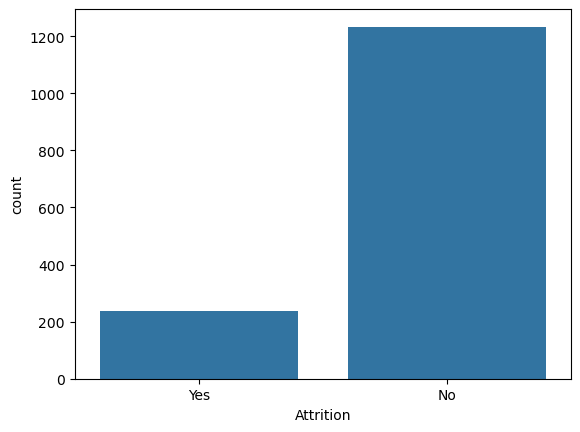

In [7]:
sns.countplot(x='Attrition', data=df)

In [ ]:
## Attrition Distribution
Most employees stayed; only a small portion left. This highlights class imbalance in the dataset.

<Axes: xlabel='Department'>

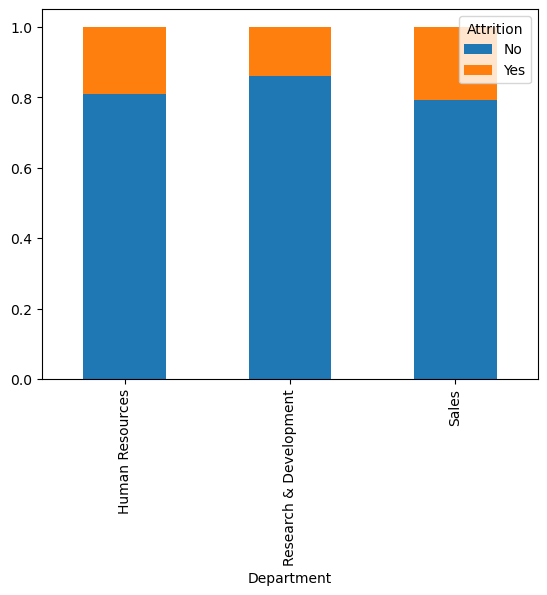

In [8]:
dept_attrition = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()
dept_attrition.plot(kind='bar', stacked=True)

In [ ]:
## Attrition by Department
Sales shows higher attrition rates compared to R&D and HR, suggesting department-specific retention challenges.

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

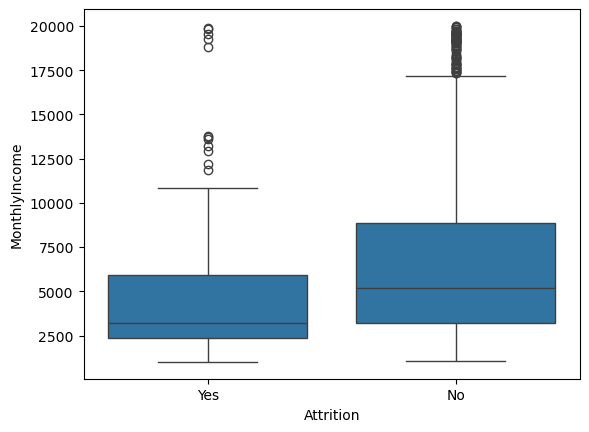

In [9]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)

In [ ]:
## Income Distribution by Attrition

Employees who left had lower median income, suggesting compensation may influence retention.

<Axes: >

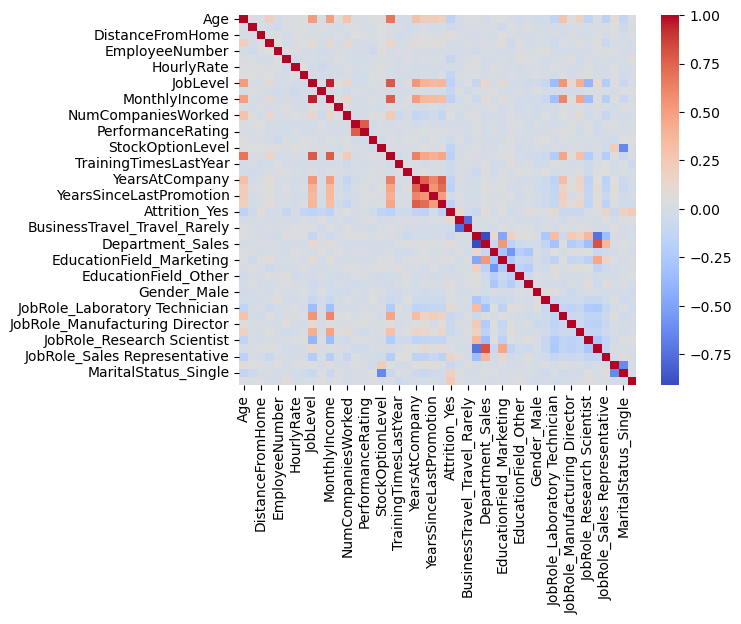

In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)
sns.heatmap(df_encoded.corr(), cmap='coolwarm')

In [ ]:
## Feature Correlation Matrix
Visualizes relationships between encoded features; highlights strong links between OverTime, JobRole, and attrition.

In [11]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

In [12]:
# Define features and target
X = df_encoded.drop('Attrition_Yes', axis=1)
y = df_encoded['Attrition_Yes']

Male count: 882
Female count: 588


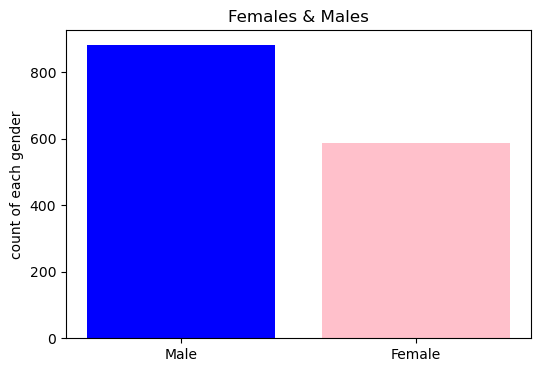

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

Male = 0
Female = 0

for val in df['Gender']:
    if val == 'Male':
        Male += 1
    elif val == 'Female':
        Female += 1
        
count = {'Male': Male, 'Female': Female}

print("Male count:", count['Male'])
print("Female count:", count['Female'])

# Plot
plt.figure(figsize=(6, 4))
plt.bar(count.keys(),count.values(), color=['blue', 'pink'])
plt.title('Females & Males')
plt.ylabel('count of each gender')

plt.show()

In [ ]:
## Gender Count
Visualized male and female employee counts to explore demographic balance in the dataset. Male count is more than that of Female.

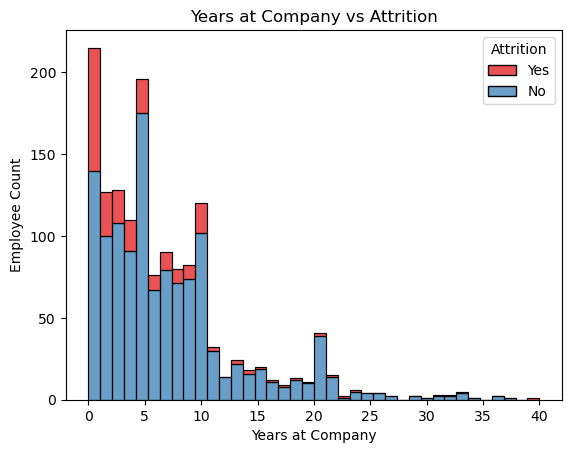

In [14]:
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', multiple='stack', palette='Set1')
plt.title('Years at Company vs Attrition')
plt.xlabel('Years at Company')
plt.ylabel('Employee Count')
plt.show()

In [ ]:
## Tenure and Attrition
Employees with shorter tenure show higher attrition, especially within the first five years.

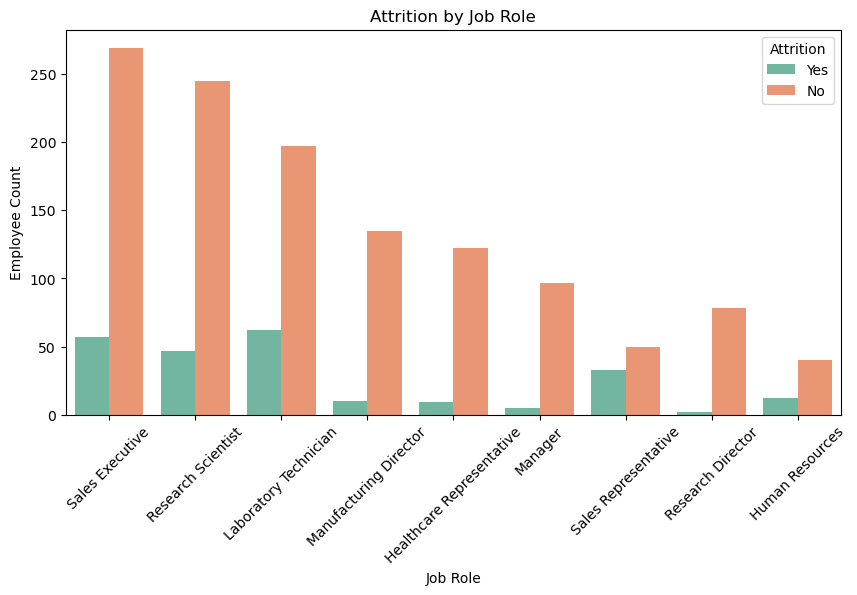

In [15]:
# Hypothesis: Certain roles may have higher turnover
plt.figure(figsize=(10, 5))
sns.countplot(x='JobRole', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition by Job Role')
plt.xticks(rotation=45)
plt.ylabel('Employee Count')
plt.xlabel('Job Role')
plt.show()

In [ ]:
## Job Role Impact
Executive and Scientist roles show higher attrition counts, highlighting role-specific turnover trends.

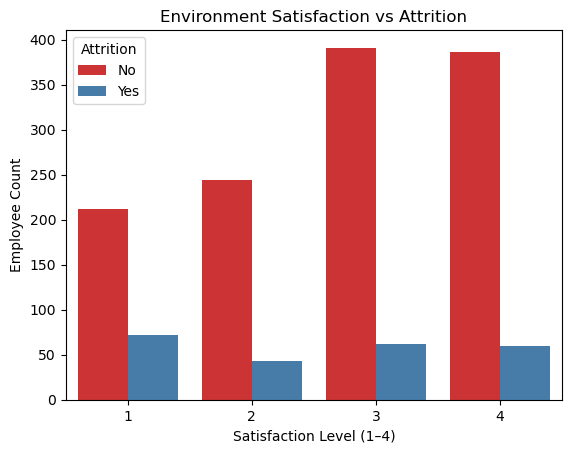

In [16]:
# Low satisfaction leads to higher attrition
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df, palette='Set1')
plt.title('Environment Satisfaction vs Attrition')
plt.xlabel('Satisfaction Level (1–4)')
plt.ylabel('Employee Count')
plt.show() 

In [ ]:
## Satisfaction and Retention
Higher environment satisfaction correlates with lower attrition, emphasizing workplace quality’s role in retention.

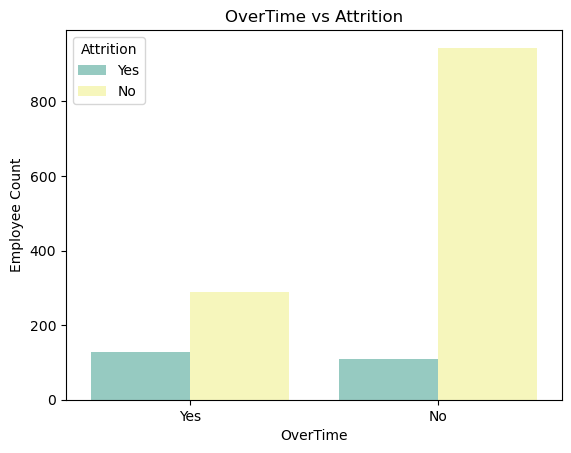

In [17]:
sns.countplot(x='OverTime', hue='Attrition', data=df, palette='Set3')
plt.title('OverTime vs Attrition')
plt.xlabel('OverTime')
plt.ylabel('Employee Count')
plt.show() 

In [ ]:
## Overtime Impact
Employees working overtime show significantly higher attrition, highlighting workload as a key retention factor.

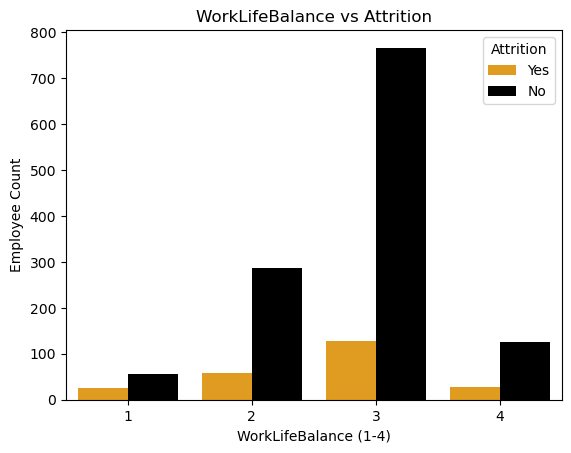

In [18]:
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette=['orange','Black'])
plt.title('WorkLifeBalance vs Attrition')
plt.xlabel('WorkLifeBalance (1-4)')
plt.ylabel('Employee Count')
plt.show() 

In [ ]:
## Work-Life Balance Effect
Better work-life balance ratings correlate with lower attrition, emphasizing the value of employee well-being.

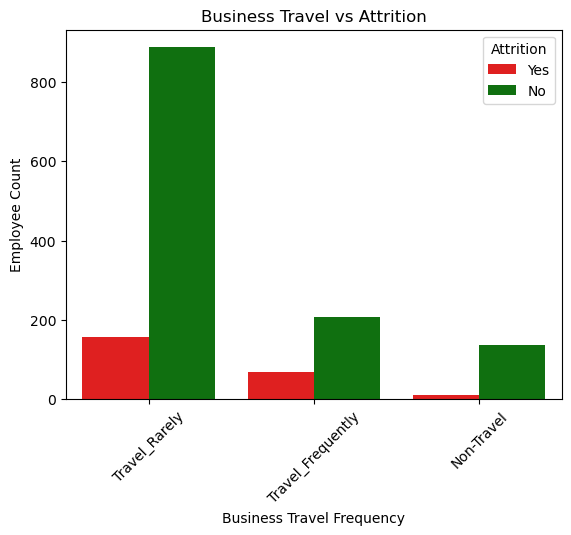

In [19]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=df, palette=['red', 'green'])
plt.title('Business Travel vs Attrition')
plt.xlabel('Business Travel Frequency')
plt.ylabel('Employee Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition')
plt.show()

In [ ]:
## Travel Frequency and Attrition
Frequent travelers show higher attrition than rare or non-travelers, suggesting travel demands may affect retention.

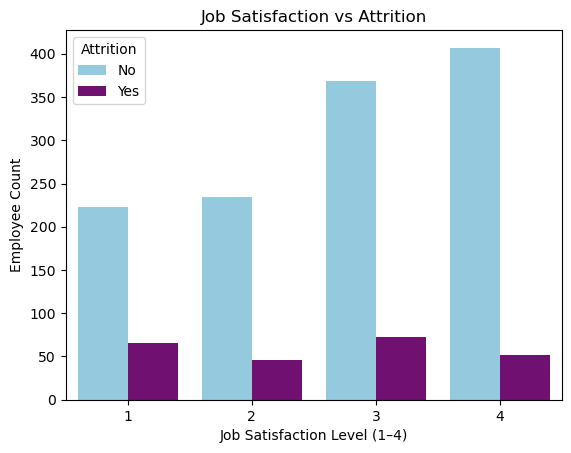

In [20]:
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette=['skyblue','purple'])
plt.title('Job Satisfaction vs Attrition')
plt.xlabel('Job Satisfaction Level (1–4)')
plt.ylabel('Employee Count')
plt.legend(title='Attrition')
plt.show() 

In [ ]:
## Satisfaction Levels
Higher job satisfaction correlates with lower attrition, reinforcing the importance of employee engagement.

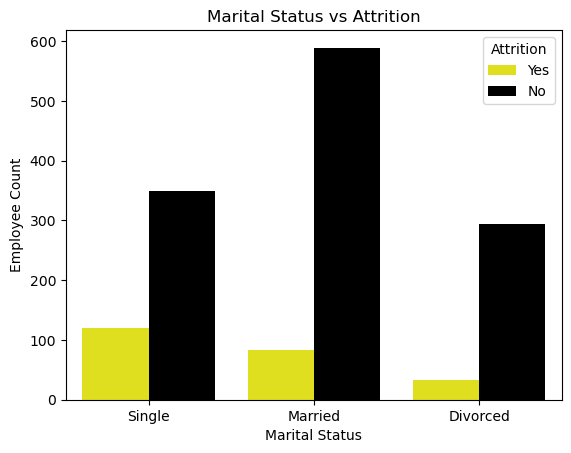

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='MaritalStatus', hue='Attrition', data=df, palette=['yellow','black'])
plt.title('Marital Status vs Attrition')
plt.xlabel('Marital Status')
plt.ylabel('Employee Count')
plt.legend(title='Attrition')
plt.show() 

In [ ]:
## Marital Status Impact
Single employees show higher attrition rates, suggesting personal stability may influence retention.

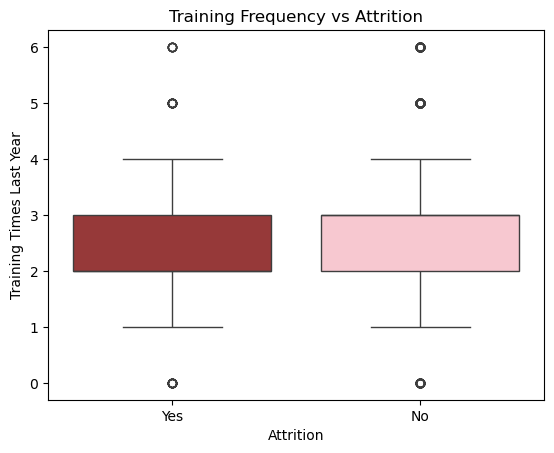

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot with custom colors and no warning
sns.boxplot(x='Attrition', y='TrainingTimesLastYear', data=df, hue='Attrition', palette=['brown', 'pink'], legend=False)

# Titles and labels
plt.title('Training Frequency vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Training Times Last Year')

# Show plot
plt.show() 

In [ ]:
## Training and Attrition
Training frequency shows minimal impact on attrition, indicating other factors may drive turnover.

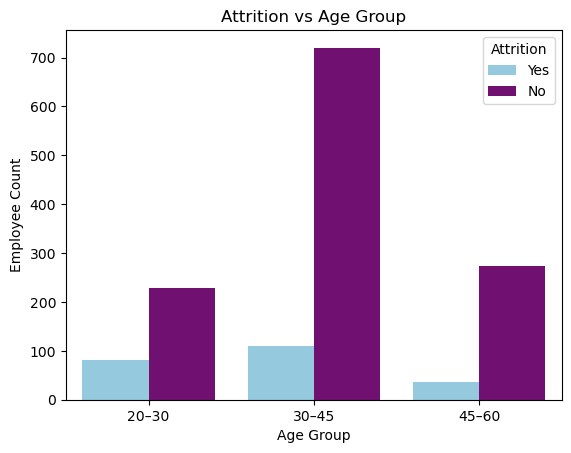

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create age bins
bins = [20, 30, 45, 60]
labels = ['20–30', '30–45', '45–60']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Step 2: Plot grouped bar chart
sns.countplot(x='AgeGroup', hue='Attrition', data=df, palette=['skyblue', 'purple'])
plt.title('Attrition vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Employee Count')
plt.legend(title='Attrition')
plt.show()

In [ ]:
## Age and Attrition
Younger employees (20–30) show higher attrition, while mid-career employees (30–45) tend to stay longer.

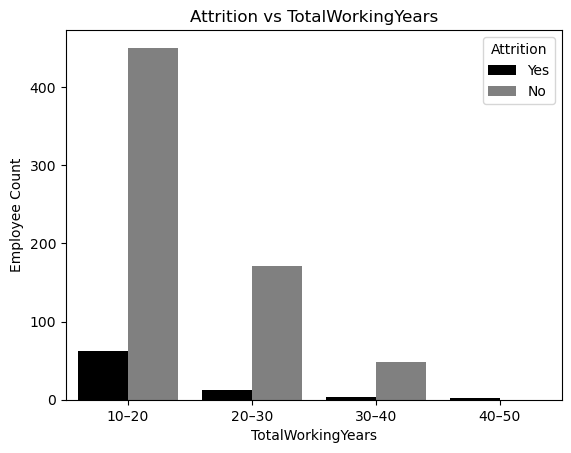

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create age bins
bins = [10, 20, 30, 40, 50]
labels = ['10–20','20–30', '30–40', '40–50']
df['TotalWorkingYears'] = pd.cut(df['TotalWorkingYears'], bins=bins, labels=labels, right=False)

sns.countplot(x='TotalWorkingYears', hue='Attrition', data=df, palette=['black', 'grey'])
plt.title('Attrition vs TotalWorkingYears')
plt.xlabel('TotalWorkingYears')
plt.ylabel('Employee Count')
plt.legend(title='Attrition')
plt.show()

In [ ]:
## Experience and Retention
Attrition is lower among employees with more total working years, suggesting experience may enhance stability.